# Importing Basic Library

In [7]:
!pip install Ipython

In [1]:
# lets import the basic libraries
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# for interactive sheells
from IPython.display import display

# supress warnings
import warnings 
warnings.filterwarnings('ignore')

# setting  up the chart size and background
plt.rcParams['figure.figsize'] = (16,8)
plt.style.use('fivethirtyeight')


In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

#  Let's Read the dataset

In [2]:
# lest read the dataset
data=pd.read_csv('movie_metadata.csv')

In [3]:
# lets check the shape 
print(data.shape)

(5043, 28)


In [16]:
# lets check the column wise info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [3]:
# lets remove unnecessary columns from the dataset

# use the 'drop()' function to drop the unnecessary columns

data = data.drop(['color',
                 'director_facebook_likes',
                 'actor_3_facebook_likes',
                 'actor_1_facebook_likes',
                 'cast_total_facebook_likes',
                 'actor_2_facebook_likes',
                 'facenumber_in_poster',
                 'content_rating',
                 'country',
                 'movie_imdb_link',
                 'aspect_ratio',
                 'plot_keywords',],
                axis=1)
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

# Missing Values Treatment

In [4]:
# letts check the rows having high percentage of missing values in the dataset
round(100*(data.isnull().sum()/len(data.index)), 2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [5]:
# some 'grosss'  and 'budget' columns have large of NaN values. drop all th rows with the NaN at this column using the
# 'isnan' function of Numpy along with negation '~'

data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]

In [6]:
#  lets again check the missing values column wise
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [7]:
data = data[data.isnull().sum(axis=1) <= 2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [8]:
# lets impute the missing values

# using mean for numerical columns
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace = True)
data['duration'].fillna(data['duration'].mean(), inplace = True)

# using mode for categorical column
data['language'].fillna(data['language'].mode()[0], inplace = True)

# As we know that We cannot use statistical values for imputing the missing values of actor names, so we will replace the 
# actor names with "Unknown Actor"

data['actor_2_name'].fillna('Unknown Actor', inplace = True)
data['actor_3_name'].fillna('Unknown Actor', inplace = True)

# as we imputed all the missing values lets check the no. of total missing values in the dataset
data.isnull().sum().sum()

0

# Feature Engneering

In [9]:
# lets convert the gross and budget from $ to million $ to make our analysis easier
data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

In [10]:
# lets create the profit column using the Budget and Gross
data['Profit'] = data['gross']-data['budget']

In [11]:
# lets also check the name of top 10 profitable Movies
data[['Profit','movie_title']].sort_values(by = 'Profit',ascending = False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [12]:
# lets looking above result we can easily analyze that there are some duplicate

# lets print the no. of raws before removing Duplicates
print("No. of Rows before Removing Duplicates",data.shape[0])

# lets remove all the duplicates from the data
data.drop_duplicates(subset = None, keep='first',inplace = True)

# lets print the number of rows after removing duplicates
print("No. of Rows before Removing Duplicates",data.shape[0])

No. of Rows before Removing Duplicates 3888
No. of Rows before Removing Duplicates 3853


In [13]:
# lets also check the name of top 10 profitable Movies again
data[['Profit','movie_title']].sort_values(by = 'Profit',ascending = False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight
439,329.999255,The Hunger Games


In [14]:
# lets check the values in the language column
data['language'].value_counts()

English       3673
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Korean           5
Portuguese       5
Norwegian        4
Persian          3
Dutch            3
Thai             3
Danish           3
Hebrew           3
Dari             2
Aboriginal       2
Indonesian       2
Mongolian        1
Bosnian          1
Vietnamese       1
Telugu           1
Russian          1
Swedish          1
Czech            1
Aramaic          1
None             1
Filipino         1
Dzongkha         1
Romanian         1
Icelandic        1
Zulu             1
Hungarian        1
Maya             1
Kazakh           1
Arabic           1
Name: language, dtype: int64

In [15]:
# Looking at the above output we can easily observe that out of 3,500 movies only 150 movies are of other languages

# so it is better to keep only two languages that is English and Foreign
def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'
    
# lets apply the function on the language column
data['language'] = data['language'].apply(language)

#lets check the value count again
data['language'].value_counts()
    
    
    

English    3673
Foreign     180
Name: language, dtype: int64

In [16]:
data['duration'].value_counts()

101.0    113
100.0    109
98.0     105
99.0      97
90.0      97
        ... 
216.0      1
240.0      1
65.0       1
45.0       1
225.0      1
Name: duration, Length: 157, dtype: int64

In [17]:
# The Duration of Movies is not varying a lot but we know that most of the users either like watching long movies or short 
# duration movies. we can categorize the movies in two part i.e., short and long.

# lets define a function for categorizing Duration of Movies
def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'
    
# lets apply this function on the duration column
data['duration']=data['duration'].apply(duration)

# lets check the values of duration column
data['duration'].value_counts()
        

Short    2936
Long      917
Name: duration, dtype: int64

In [18]:
# lets also check the values in the Genres Column
data['genres'].value_counts()

Drama                                     153
Comedy|Drama|Romance                      151
Comedy|Drama                              147
Comedy                                    145
Comedy|Romance                            135
                                         ... 
Action|Adventure|Family|Fantasy|Sci-Fi      1
Crime|Drama|Fantasy|Mystery                 1
Action|Comedy|Drama|War                     1
Adventure|Fantasy|Mystery|Thriller          1
Comedy|Mystery|Romance                      1
Name: genres, Length: 762, dtype: int64

In [19]:
data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [20]:
# we can see from the above output that most of the movies are having a lot of genres
# also, a movie can have so many genres so lets keep four genres

data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])

# Some of the movies have only one genre. In such cases, assign the same genre to 'genre_2' as well
data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])

# lets check the head of the  data
data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


# data visualization

   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice               1599.794424
1    150                        Ghostbusters               1076.336425
2   1582                        Ghostbusters               1075.827482
3     96                        Interstellar               1024.560802
4   3015               10 Days in a Madhouse                828.025478
5    945                      Into the Woods                692.937200
6     73                       Suicide Squad                652.816996
7   1190                Fifty Shades of Grey                624.306881
8    108                            Warcraft                622.790277
9     92        Independence Day: Resurgence                599.274128


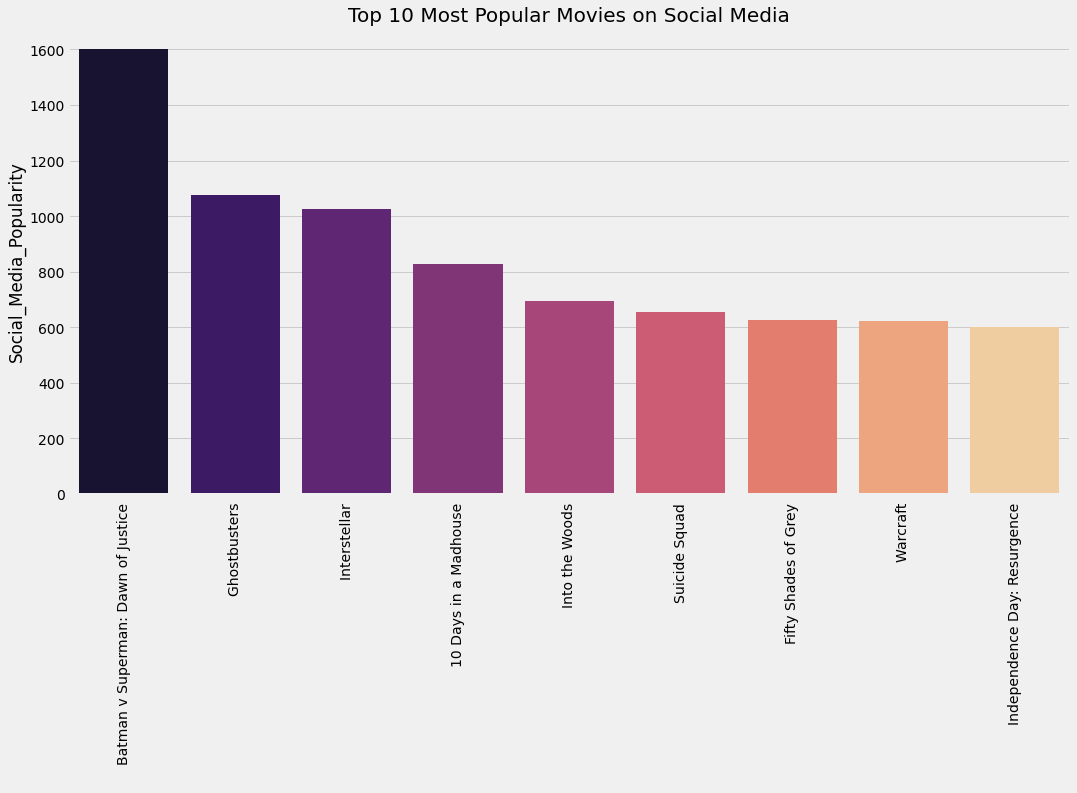

In [21]:
# lets also calculate the Social Media Popularity of a Movie 

# to calculate popularity of a movie, we can aggregate No. of voted users, No. of Users for Reviews, and Facebook Likes.
data['Social_Media_Popularity'] = (data['num_user_for_reviews']/
                                   data['num_voted_users'])*data['movie_facebook_likes']

# lets also check the Top 10 Most Popular Movies on Social Media
x = data[['movie_title','Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity',
                                                                ascending = False).head(10).reset_index()
print(x)

sns.barplot(x['movie_title'], x['Social_Media_Popularity'], palette = 'magma')
plt.title('Top 10 Most Popular Movies on Social Media', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel(' ')
plt.show()

# Analysis which Genres is most bankable?

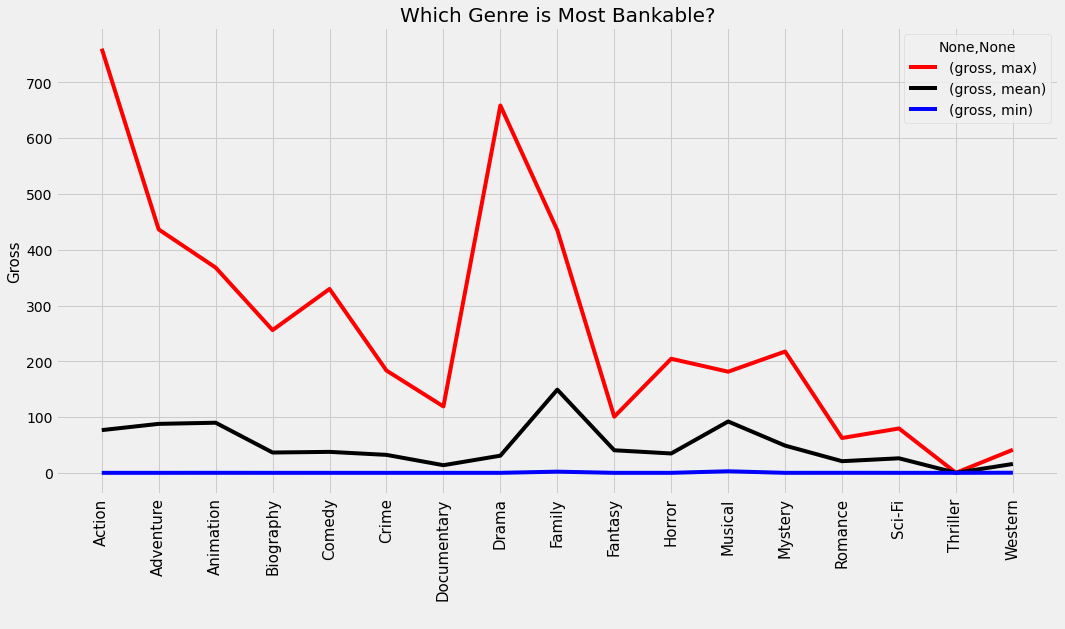

The Most Profitable Movie from each Genre


,Genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


In [22]:
# Lets compare the Gross with Genres

# first group the genres and get max, min, and avg gross of the movies of that genre.)
display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))

# lets plot these values using lineplot
data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind = 'line', color = ['red','black','blue'])
plt.title('Which Genre is Most Bankable?', fontsize = 20)
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
plt.xlabel(' ',)
plt.show()

print('The Most Profitable Movie from each Genre')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1',
                                    'movie_title','gross']].style.background_gradient(cmap = 'copper'))

# Loss and profit analysis on English and Foreign movie

In [23]:
# lets convert year into integer
data['title_year'] = data['title_year'].astype('int')

print('Most Profitable Years in Box Office')
display(data[['title_year','language','Profit']].groupby(['language',
                                    'title_year']).agg('sum').sort_values(by = 'Profit',
                                     ascending = False).head(10).style.background_gradient(cmap = 'Greens'))



Most Profitable Years in Box Office


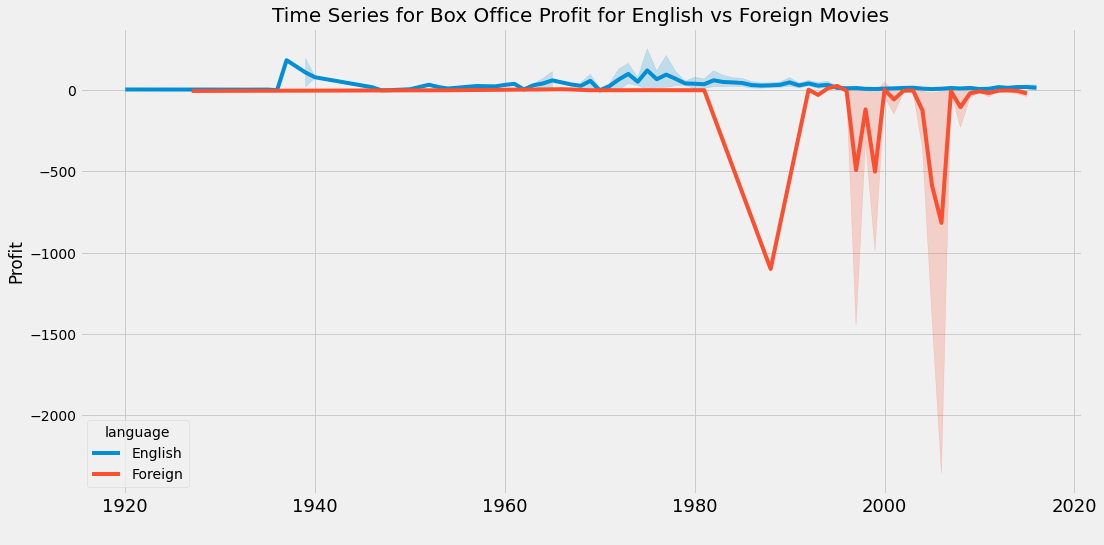

Movies that Made Huge Losses


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


In [24]:
# lets plot them
sns.lineplot(data['title_year'], data['Profit'], hue = data['language'])
plt.title('Time Series for Box Office Profit for English vs Foreign Movies', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(' ')
plt.show()

print("Movies that Made Huge Losses")
display(data[data['Profit'] < -2000][['movie_title',
                        'language','Profit']].style.background_gradient(cmap = 'Reds'))

In [25]:
# lets print the movies having huge loses
print('Movies that Made Huge Losses')
display(data[data['Profit']<-2000][['movie_title',
                                   'language','Profit']].style.background_gradient(cmap='Reds'))

Movies that Made Huge Losses


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


# Gross comperision on long and short movies

In [26]:
# Gross of movie based on their duration 
display(data[data['duration'] == 'Long'][['movie_title', 'duration', 'gross',
                    'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))

display(data[data['duration'] == 'Short'][['movie_title', 'duration', 'gross',
                    'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))



,movie_title,duration,gross,Profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
17,The Avengers,Long,623.279547,403.279547


,movie_title,duration,gross,Profit
3080,E.T. the Extra-Terrestrial,Short,434.949459,424.449459
509,The Lion King,Short,422.783777,377.783777
812,Deadpool,Short,363.024263,305.024263
521,Despicable Me 2,Short,368.049635,292.049635
338,Finding Nemo,Short,380.838870,286.838870


Text(0.5, 1.0, 'Gross Comparison')

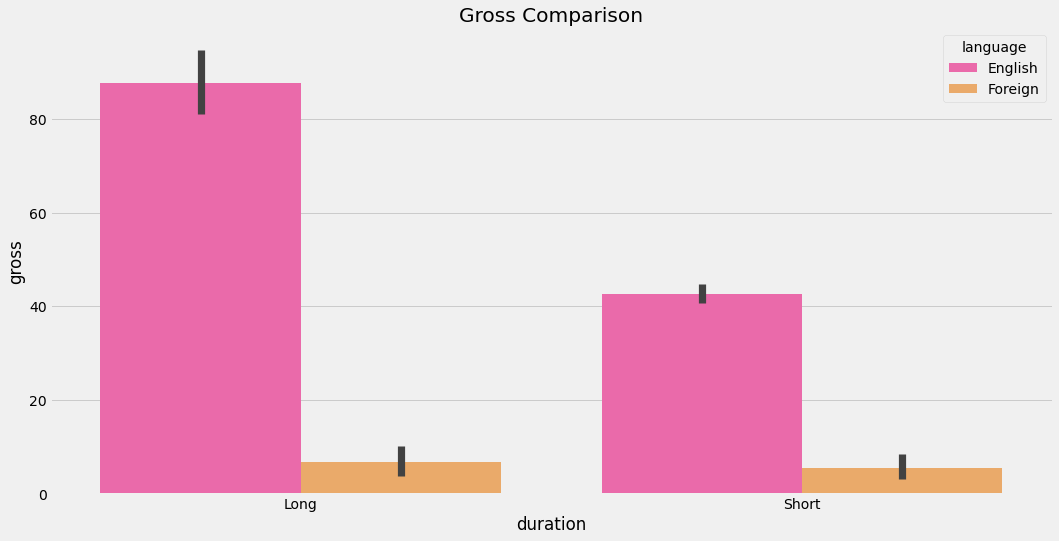

In [27]:
# lets check the impact of gross on long and short duration based on english and foreign language movie using grouped bar chart
sns.barplot(data['duration'], data['gross'], hue = data['language'], palette = 'spring')
plt.title('Gross Comparison')

# Assosiation between IMBD Ratiing and Duration

In [28]:
print("Average IMDB Score for Long Duration Movies is {0:.2f}".format(data[data['duration'] == 'Long']['imdb_score'].mean()))
print("Average IMDB Score for Short Duration Movies is {0:.2f}".format(data[data['duration'] == 'Short']['imdb_score'].mean()))



Average IMDB Score for Long Duration Movies is 7.06
Average IMDB Score for Short Duration Movies is 6.28


In [29]:
print("\nHighest Rated Long Duration Movie\n", 
    data[data['duration'] == 'Long'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))
print("\nHighest Rated Short Duration Movie\n", 
    data[data['duration'] == 'Short'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))



Highest Rated Long Duration Movie
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3

Highest Rated Short Duration Movie
               movie_title  imdb_score
3592  The Usual Suspects          8.6


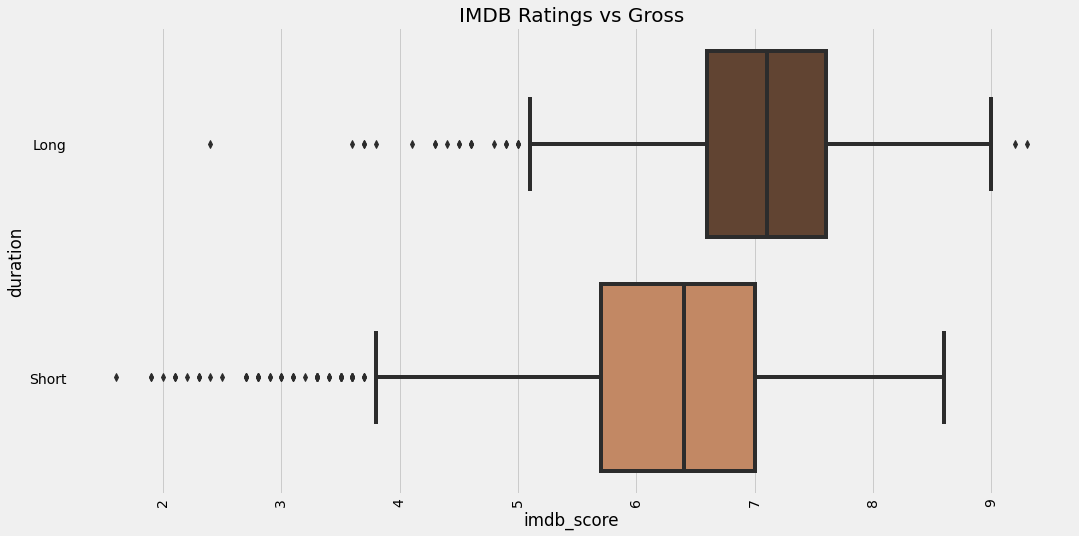

In [30]:
# box plot
sns.boxplot(data['imdb_score'], data['duration'], palette = 'copper')
plt.title('IMDB Ratings vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

#  Comparing Critically acclaimed Actors

In [31]:
def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    
    y = y[['movie_title',
       'budget',
       'gross',
       'title_year',
       'genres',
       'language',
       'imdb_score',
        ]]
    return y

In [32]:
query_actors('Kristen Stewart')

,movie_title,budget,gross,title_year,genres,language,imdb_score
432,Jumper,85.0,80.170146,2008,Action|Adventure|Sci-Fi|Thriller,English,6.1
682,Zathura: A Space Adventure,65.0,28.045540,2005,Action|Adventure|Comedy|Family|Fantasy|Sci-Fi,English,6.1
1043,Panic Room,48.0,95.308367,2002,Crime|Drama|Thriller,English,6.8
1378,Twilight,37.0,191.449475,2008,Drama|Fantasy|Romance,English,5.2
2017,On the Road,25.0,0.717753,2012,Adventure|Drama,English,6.1
2250,Into the Wild,15.0,18.352454,2007,Adventure|Biography|Drama,English,8.2
2262,Twilight,37.0,191.449475,2008,Drama|Fantasy|Romance,English,5.2
2433,Catch That Kid,18.0,16.702864,2004,Comedy|Crime,English,5.2
2610,The Yellow Handkerchief,15.5,0.317040,2008,Drama|Romance,English,6.8
3081,In the Land of Women,10.0,11.043445,2007,Comedy|Drama|Romance,English,6.5


In [33]:
query_actors('Tom Cruise')

,movie_title,budget,gross,title_year,genres,language,imdb_score
75,Edge of Tomorrow,178.0,100.189501,2014,Action|Adventure|Sci-Fi,English,7.9
135,Mission: Impossible - Rogue Nation,150.0,195.000874,2015,Action|Adventure|Thriller,English,7.4
155,Mission: Impossible - Ghost Protocol,145.0,209.364921,2011,Action|Adventure|Thriller,English,7.4
158,The Last Samurai,140.0,111.110575,2003,Action|Drama|History|War,English,7.7
189,War of the Worlds,132.0,234.277056,2005,Adventure|Sci-Fi|Thriller,English,6.5
220,Mission: Impossible II,125.0,215.397307,2000,Action|Adventure|Thriller,English,6.1
234,Knight and Day,117.0,76.418654,2010,Action|Comedy|Romance,English,6.3
284,Minority Report,102.0,132.014112,2002,Action|Mystery|Sci-Fi|Thriller,English,7.7
370,Valkyrie,75.0,83.077470,2008,Drama|History|Thriller|War,English,7.1
438,Mission: Impossible,80.0,180.965237,1996,Action|Adventure|Thriller,English,7.1


In [34]:
query_actors('Scarlett Johansson')

,movie_title,budget,gross,title_year,genres,language,imdb_score
79,The Jungle Book,175.0,362.645141,2016,Adventure|Drama|Family|Fantasy,English,7.8
86,Captain America: The Winter Soldier,170.0,259.746958,2014,Action|Adventure|Sci-Fi,English,7.8
280,The Island,126.0,35.799026,2005,Action|Adventure|Romance|Sci-Fi|Thriller,English,6.9
735,The Horse Whisperer,60.0,75.370763,1998,Drama|Romance|Western,English,6.5
796,The Black Dahlia,50.0,22.518325,2006,Crime|Drama|Mystery|Thriller,English,5.6
806,The Spirit,60.0,19.781879,2008,Action|Crime|Fantasy|Thriller,English,4.8
1189,Lucy,40.0,126.546825,2014,Action|Sci-Fi|Thriller,English,6.4
1602,The SpongeBob SquarePants Movie,30.0,85.416609,2004,Adventure|Animation|Comedy|Family|Fantasy,English,7.0
1687,Eight Legged Freaks,30.0,17.266505,2002,Action|Comedy|Horror,English,5.4
1805,The Jungle Book,175.0,362.645141,2016,Adventure|Drama|Family|Fantasy,English,7.8


In [38]:
query_actors('Alexandra Daddario')

,movie_title,budget,gross,title_year,genres,language,imdb_score


#  Making Report for Actor

### It would be very interesting if we can create a function which can provide a summary of an Actor which should include:

### - The Time Period of Actor.
### - Maximum Gross Amount
### - The Time Period of Actor
### - Minimum Gross Amount
### - Average IMBD Rating for the movie
### - Most Common Genres


In [35]:
def actors_report(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    print("Time:",y['title_year'].min(), y['title_year'].max())
    print("Max Gross : {0:.2f} Millions".format(y['gross'].max()))
    print("Avg Gross : {0:.2f} Millions".format(y['gross'].mean()))
    print("Min Gross : {0:.2f} Millions".format(y['gross'].min()))
    print("Number of 100 Million Movies :", y[y['gross'] > 100].shape[0])
    print("Avg IMDB Score : {0:.2f}".format(y['imdb_score'].mean()))
    print("Most Common Genres:\n",y['Genre1'].value_counts().head())
    
actors_report('Kristen Stewart')

Time: 2002 2014
Max Gross : 300.52 Millions
Avg Gross : 100.08 Millions
Min Gross : 0.32 Millions
Number of 100 Million Movies : 6
Avg IMDB Score : 6.06
Most Common Genres:
 Adventure    5
Drama        4
Comedy       3
Action       3
Crime        1
Name: Genre1, dtype: int64


In [55]:
# Lets compare Brad Pitt, Leonardo Caprio and Tom Cruise

def critically_acclaimed_actors(m):
    a = data[data['actor_1_name'] == m]
    b = data[data['actor_2_name'] == m]
    c = data[data['actor_3_name'] == m]
    x = a.append(b)
    y = x.append(c)
    return y['num_critic_for_reviews'].sum().astype('int')


print("Number of Critics Reviews for Brad Pitt")
display(critically_acclaimed_actors('Brad Pitt'))

print("Number of Critics Reviews for Leonardo DiCaprio")
display(critically_acclaimed_actors('Leonardo DiCaprio'))

print("Number of Critics Reviews for Tom Cruise")
display(critically_acclaimed_actors('Tom Cruise'))

Number of Critics Reviews for Brad Pitt


7814

Number of Critics Reviews for Leonardo DiCaprio


7014

Number of Critics Reviews for Tom Cruise


6740

# Top Movies based on Gross, and IMDB

In [60]:
pd.set_option('max_rows', 3000)

@interact
def show_movies_more_than(column='imdb_score', score=9.0):
    x = data.loc[data[column] > score][[ 'title_year','movie_title',
                                       'director_name',
                                       'actor_1_name',
                                       'actor_2_name',
                                       'actor_3_name',
                                       'Profit',
                                       'imdb_score',
                                    ]]
    x = x.sort_values(by = 'imdb_score', ascending = False)
    x = x.drop_duplicates(keep = 'first')
    return x

interactive(children=(Text(value='imdb_score', description='column'), FloatSlider(value=9.0, description='scor…

In [63]:
pd.set_option('max_rows',30000)

@interact
def show_articles_more_than(column = ['budget','gross'],x=1000):
    return data.loc[data[column]>x][['movie_title','duration','gross','Profit','imdb_score']]

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), IntSlider(v…

# Recommending Movies based on Languages and Actors

In [64]:
def recommend_lang(x):
    y = data[['language','movie_title','imdb_score']][data['language'] == x]
    y = y.sort_values(by = 'imdb_score', ascending = False)
    return y.head(15)


In [65]:
recommend_lang('Foreign')

,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.9
4029,Foreign,City of God,8.7
4747,Foreign,Seven Samurai,8.7
2373,Foreign,Spirited Away,8.6
4921,Foreign,Children of Heaven,8.5
4259,Foreign,The Lives of Others,8.5
3931,Foreign,Samsara,8.5
4659,Foreign,A Separation,8.4
1329,Foreign,Baahubali: The Beginning,8.4
2970,Foreign,Das Boot,8.4


In [66]:
recommend_lang('English')

,language,movie_title,imdb_score
1937,English,The Shawshank Redemption,9.3
3466,English,The Godfather,9.2
2837,English,The Godfather: Part II,9.0
66,English,The Dark Knight,9.0
3355,English,Pulp Fiction,8.9
1874,English,Schindler's List,8.9
339,English,The Lord of the Rings: The Return of the King,8.9
683,English,Fight Club,8.8
270,English,The Lord of the Rings: The Fellowship of the R...,8.8
2051,English,Star Wars: Episode V - The Empire Strikes Back,8.8


# Recommending Movies Based on Actors

In [69]:

def recommend_movies_on_actors(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
    a = a.append(b)
    a = a.append(c)
    a = a.sort_values(by = 'imdb_score', ascending = False)
    return a.head(15)

In [70]:
recommend_movies_on_actors('Tom Cruise')

,movie_title,imdb_score
1868,Rain Man,8.0
75,Edge of Tomorrow,7.9
284,Minority Report,7.7
158,The Last Samurai,7.7
736,Collateral,7.6
1524,A Few Good Men,7.6
940,Interview with the Vampire: The Vampire Chroni...,7.6
155,Mission: Impossible - Ghost Protocol,7.4
135,Mission: Impossible - Rogue Nation,7.4
671,Eyes Wide Shut,7.3


# Recommending Similar Genres and Movies

In [74]:
!pip install mlxtend

In [75]:
from mlxtend.preprocessing import TransactionEncoder

x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)

# lets check the head of x
x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [76]:
# lets convert this boolean value so that we can perform calculations

genres = x.astype('int')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [77]:
# now lets insert movie titles in the first column, so that we can better understand the data

genres.insert(0, 'movie_title', data['movie_title'])

genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [78]:
# lets set these movie titles as index of the data
genres = genres.set_index('movie_title')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [79]:
# making a recommendation engine for getting similar genres

def recommendation_genres(gen):
    gen = genres[gen]
    similar_genres = genres.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending=False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(3)

In [80]:
recommendation_genres('Action')

Adventure    0.320532
Thriller     0.303708
Sci-Fi       0.295018
dtype: float64

# Recommending similar movies

In [81]:
# lets make a sparse matrix to recommend the movies

x = genres.transpose()
x.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,Four Weddings and a Funeral,NaN,NaN,25th Hour,NaN,Bound,Requiem for a Dream,NaN,Tango,NaN
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [82]:
# making a recommendation engine for getting similar movies

def recommendation_movie(movie):    
    movie = x[movie+'\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

In [84]:
# lets test some result
recommendation_movie('The Avengers')

movie_title
Quantum of Solace                             1.0
The Flowers of War                            1.0
The Girl with the Dragon Tattoo               1.0
Lost in Space                                 1.0
Alvin and the Chipmunks: The Squeakquel       1.0
R.I.P.D.                                      1.0
Australia                                     1.0
The Hobbit: The Battle of the Five Armies     1.0
Edge of Darkness                              1.0
American Sniper                               1.0
The Avengers                                  1.0
The Last Samurai                              1.0
American Reunion                              1.0
Eraser                                        1.0
Risen                                         1.0
NaN                                           1.0
Pirates of the Caribbean: At World's End      1.0
Rapa Nui                                      1.0
NaN                                           1.0
The Matrix Reloaded                   

In [46]:
display(data[data['language'] == 'Foreign'][['movie_title', 'language', 'gross',
                    'Profit']].sort_values(by = 'gross',ascending = False).head(5).style.background_gradient(cmap = 'spring'))


,movie_title,language,gross,Profit
2605,"Crouching Tiger, Hidden Dragon",Foreign,128.067808,113.067808
4024,March of the Penguins,Foreign,77.413017,69.413017
377,The Interpreter,Foreign,72.515360,-7.484640
1236,Apocalypto,Foreign,50.859889,10.859889
484,The Legend of Zorro,Foreign,45.356386,-29.643614
